In [4]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../data/cleaned_airbnb.csv')

#EDA on the cleaned data

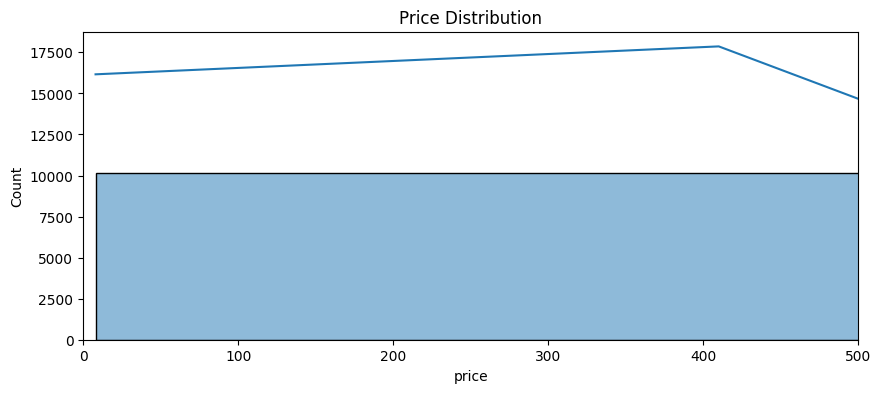

In [9]:
# Distribution of price
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlim(0, 500)
plt.show()

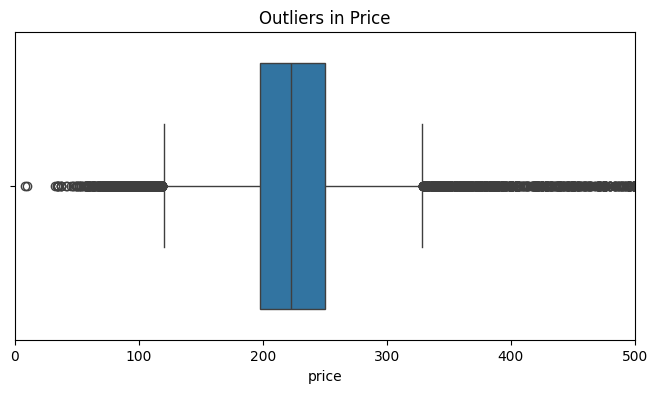

In [10]:
# Boxplot for outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.title("Outliers in Price")
plt.xlim(0, 500)
plt.show()

In [11]:
#count outliers
outliers = df[df['price'] > 500]
print(f"Number of outliers in price: {len(outliers)}")

Number of outliers in price: 395


Text(0.5, 1.0, 'Room Type vs Price')

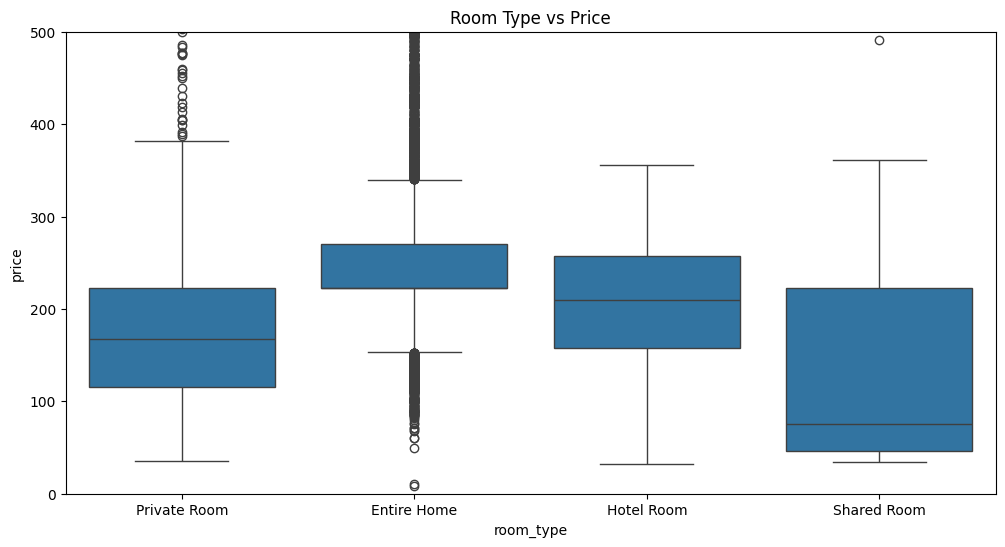

In [17]:
#compare roomtypes with prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 500)
plt.title("Room Type vs Price")

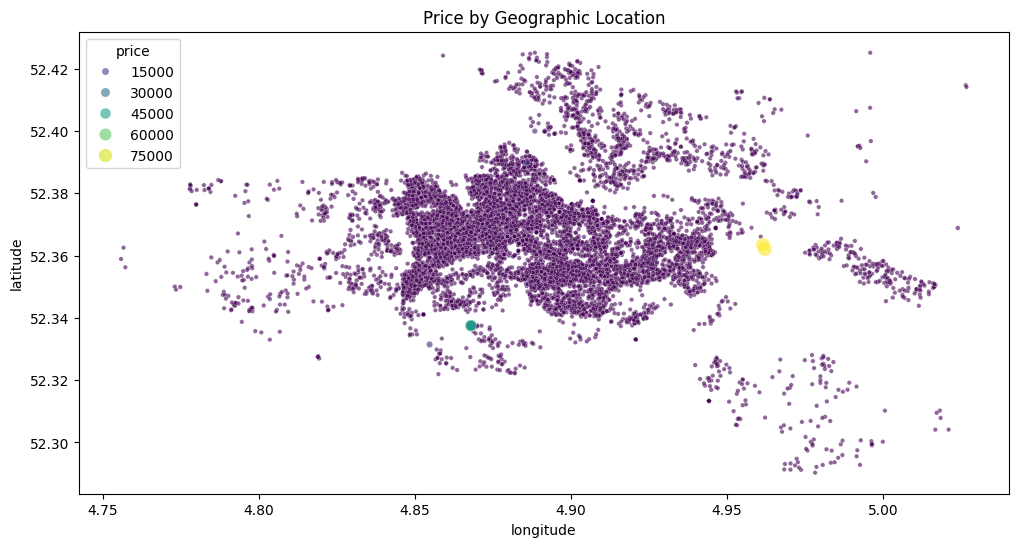

In [15]:
#Geographical spread heatmap
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', size='price',
                sizes=(10, 100), alpha=0.6, data=df, palette='viridis')
plt.title("Price by Geographic Location")
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

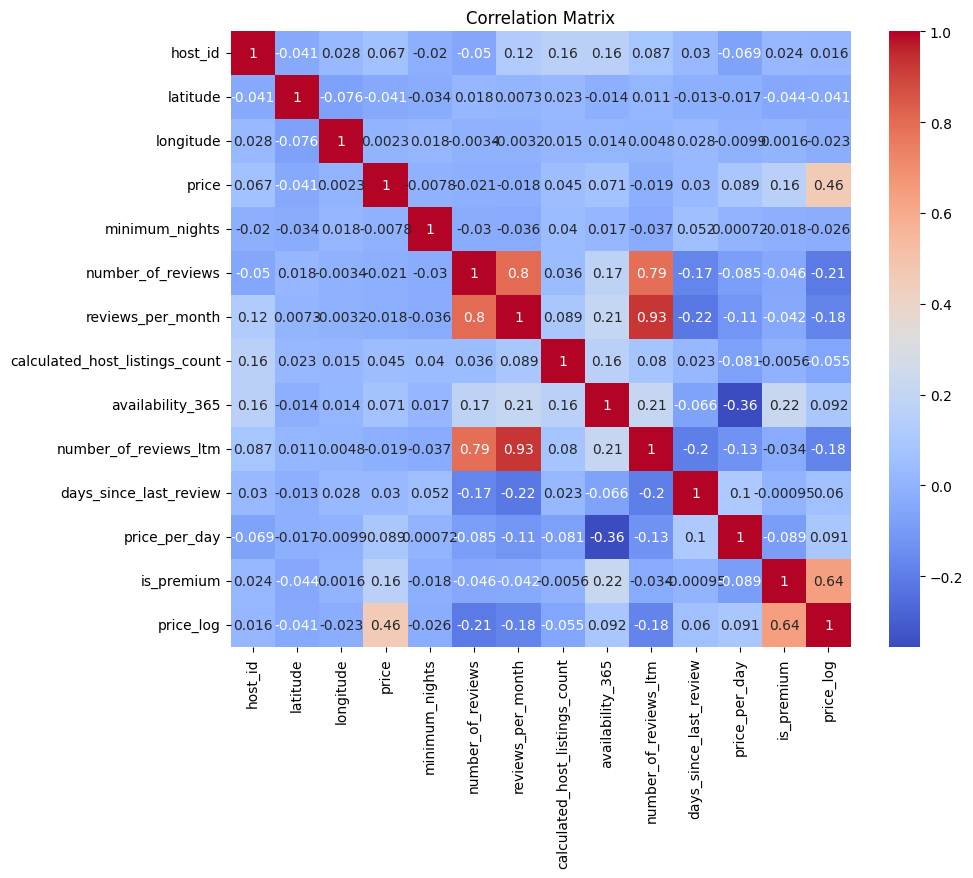

In [19]:
#price correlation with numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Review Frequency')

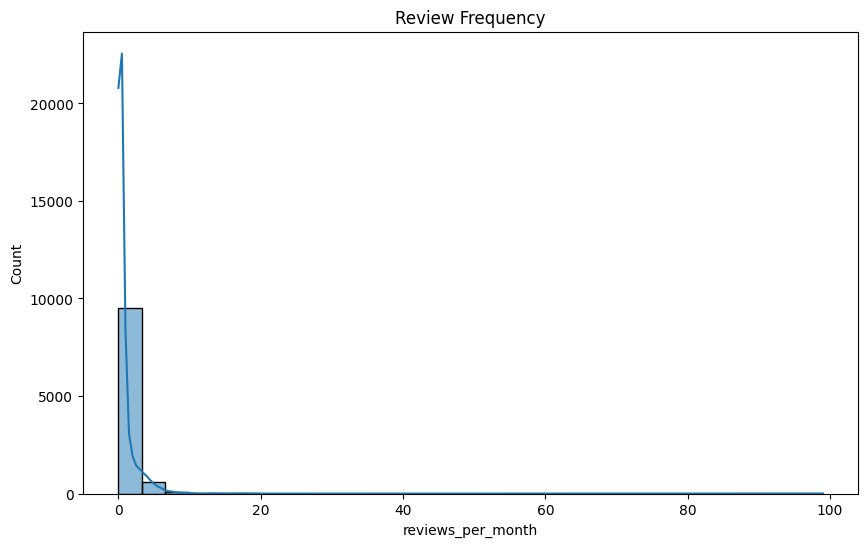

In [23]:
#Review Activity trends 
plt.figure(figsize=(10, 6))
sns.histplot(df['reviews_per_month'], bins=30, kde=True)
plt.title("Review Frequency")

Text(0.5, 1.0, 'Minimum Stay Requirement vs Price')

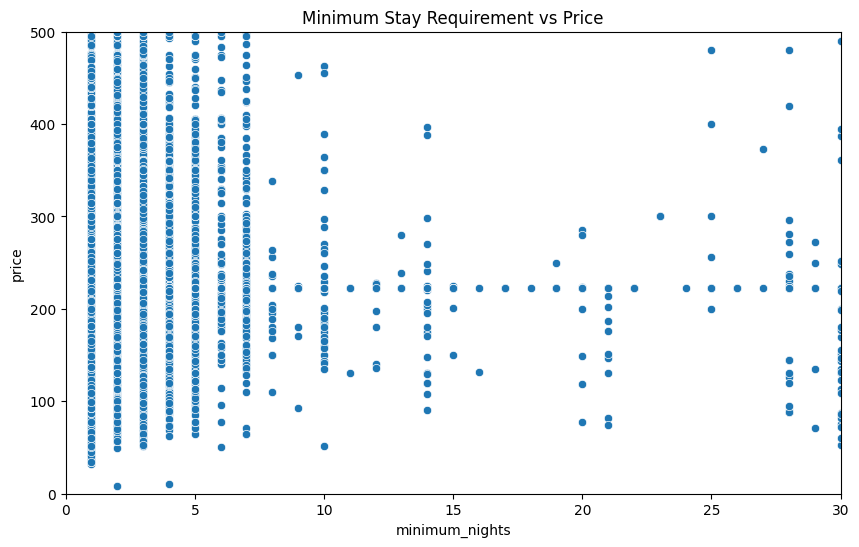

In [24]:
#minimum nights vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='price', data=df)
plt.xlim(0, 30)
plt.ylim(0, 500)
plt.title("Minimum Stay Requirement vs Price")


C:\Users\supre\AppData\Local\Temp\ipykernel_4808\1030091177.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  availability_room_price = df.groupby(['availability_category', 'room_type'])['price'].mean().unstack()


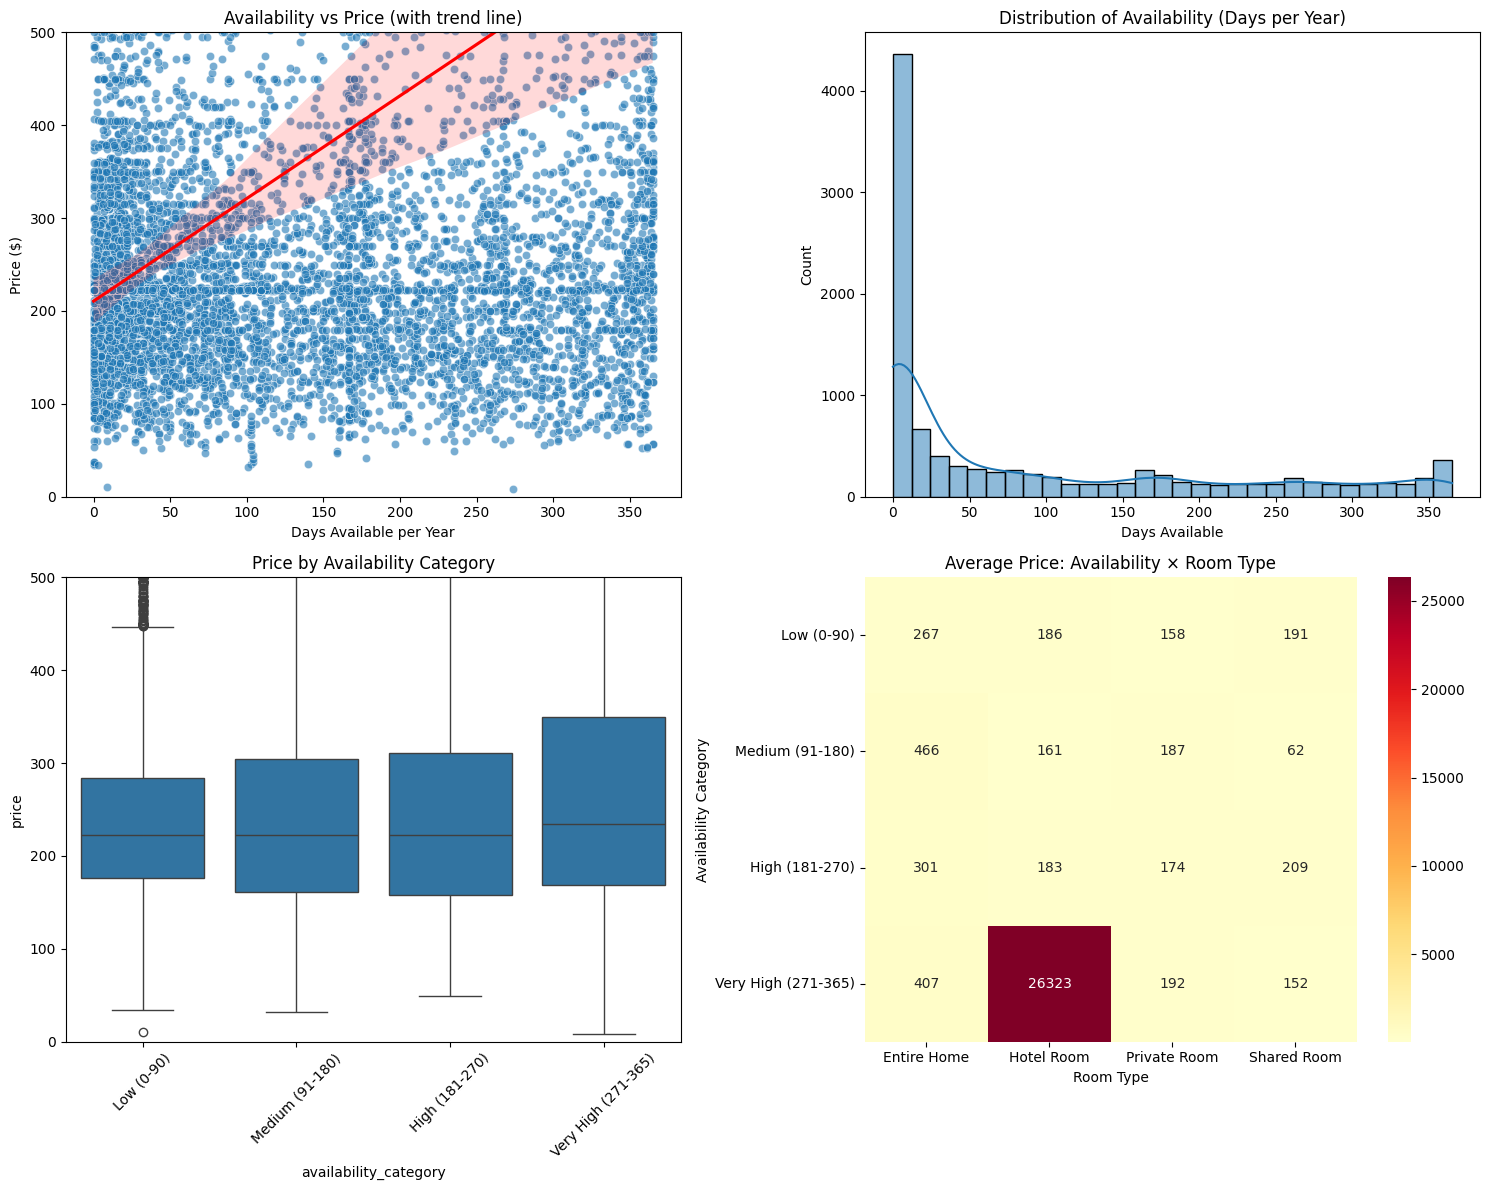

In [26]:
# Availability impacts - Enhanced Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot with trend line
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.6, ax=axes[0,0])
sns.regplot(x='availability_365', y='price', data=df, scatter=False, color='red', ax=axes[0,0])
axes[0,0].set_ylim(0, 500)
axes[0,0].set_title("Availability vs Price (with trend line)")
axes[0,0].set_xlabel("Days Available per Year")
axes[0,0].set_ylabel("Price ($)")

# 2. Availability distribution
sns.histplot(df['availability_365'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribution of Availability (Days per Year)")
axes[0,1].set_xlabel("Days Available")
axes[0,1].set_ylabel("Count")

# 3. Availability categories vs Price
df['availability_category'] = pd.cut(df['availability_365'], 
                                   bins=[0, 90, 180, 270, 365], 
                                   labels=['Low (0-90)', 'Medium (91-180)', 
                                          'High (181-270)', 'Very High (271-365)'])
sns.boxplot(x='availability_category', y='price', data=df, ax=axes[1,0])
axes[1,0].set_ylim(0, 500)
axes[1,0].set_title("Price by Availability Category")
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Heatmap: Availability vs Room Type
availability_room_price = df.groupby(['availability_category', 'room_type'])['price'].mean().unstack()
sns.heatmap(availability_room_price, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title("Average Price: Availability × Room Type")
axes[1,1].set_xlabel("Room Type")
axes[1,1].set_ylabel("Availability Category")

plt.tight_layout()
plt.show()

C:\Users\supre\AppData\Local\Temp\ipykernel_4808\1251099688.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  availability_price_avg = df.groupby('availability_bins')['price'].mean()


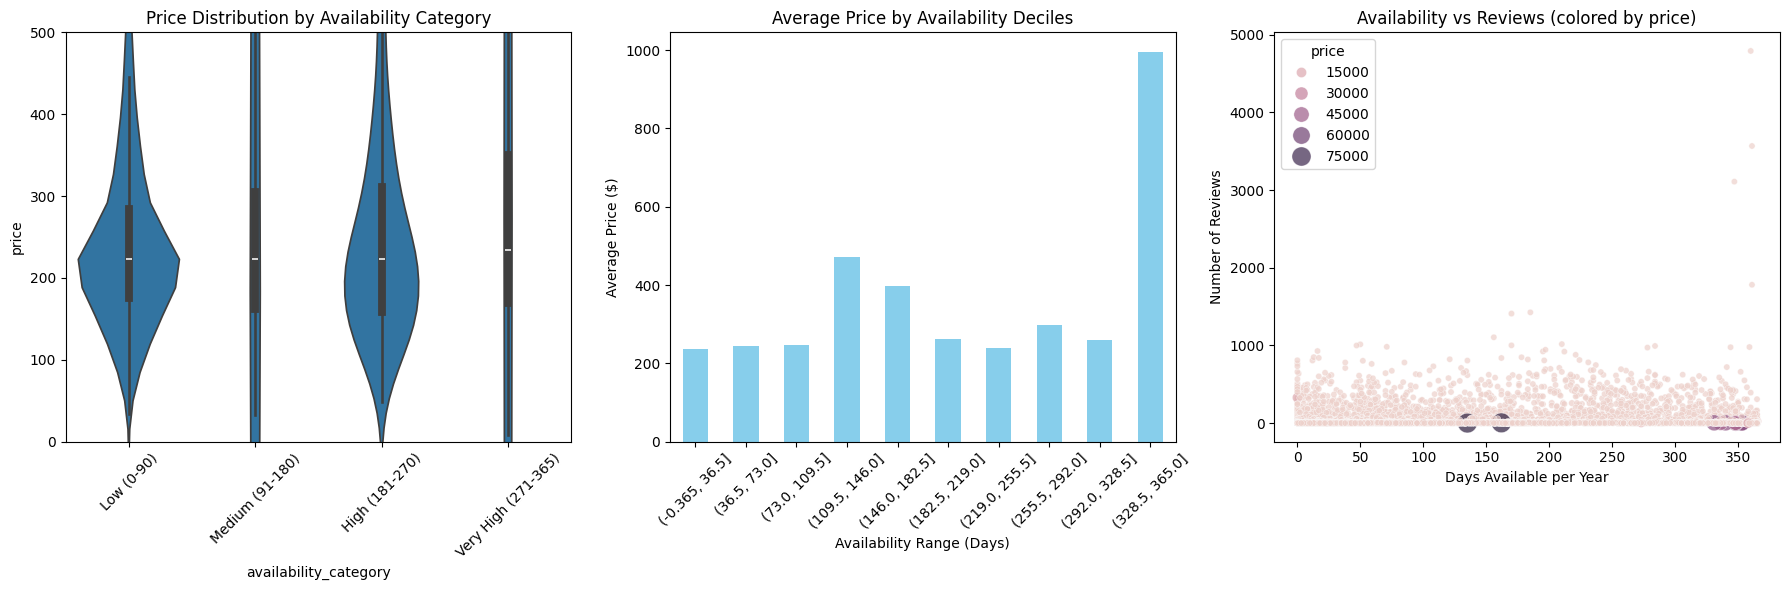

In [27]:
# Additional Availability Insights
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Violin plot showing price distribution within availability categories
sns.violinplot(x='availability_category', y='price', data=df, ax=axes[0])
axes[0].set_ylim(0, 500)
axes[0].set_title("Price Distribution by Availability Category")
axes[0].tick_params(axis='x', rotation=45)

# 2. Average price by availability bins (more granular)
df['availability_bins'] = pd.cut(df['availability_365'], bins=10)
availability_price_avg = df.groupby('availability_bins')['price'].mean()
availability_price_avg.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title("Average Price by Availability Deciles")
axes[1].set_xlabel("Availability Range (Days)")
axes[1].set_ylabel("Average Price ($)")
axes[1].tick_params(axis='x', rotation=45)

# 3. Availability vs Reviews relationship
sns.scatterplot(x='availability_365', y='number_of_reviews', 
                hue='price', size='price', sizes=(20, 200), 
                alpha=0.7, data=df, ax=axes[2])
axes[2].set_title("Availability vs Reviews (colored by price)")
axes[2].set_xlabel("Days Available per Year")
axes[2].set_ylabel("Number of Reviews")

plt.tight_layout()
plt.show()

In [28]:
# Statistical Analysis of Availability Impact
print("=== AVAILABILITY IMPACT ANALYSIS ===\n")

# Correlation analysis
availability_price_corr = df['availability_365'].corr(df['price'])
print(f"Correlation between Availability and Price: {availability_price_corr:.3f}")

# Price statistics by availability category
print("\n=== PRICE STATISTICS BY AVAILABILITY CATEGORY ===")
availability_stats = df.groupby('availability_category')['price'].agg(['count', 'mean', 'median', 'std']).round(2)
print(availability_stats)

# High vs Low availability comparison
high_availability = df[df['availability_365'] > 300]['price']
low_availability = df[df['availability_365'] < 90]['price']

print(f"\n=== HIGH vs LOW AVAILABILITY COMPARISON ===")
print(f"High Availability (>300 days) - Average Price: ${high_availability.mean():.2f}")
print(f"Low Availability (<90 days) - Average Price: ${low_availability.mean():.2f}")
print(f"Price Difference: ${low_availability.mean() - high_availability.mean():.2f}")

# Availability patterns by room type
print(f"\n=== AVAILABILITY PATTERNS BY ROOM TYPE ===")
room_availability = df.groupby('room_type')['availability_365'].agg(['mean', 'median']).round(1)
print(room_availability)

=== AVAILABILITY IMPACT ANALYSIS ===

Correlation between Availability and Price: 0.071

=== PRICE STATISTICS BY AVAILABILITY CATEGORY ===
                       count    mean  median      std
availability_category                                
Low (0-90)              3236  250.17   223.0   160.69
Medium (91-180)         1259  385.22   223.0  3182.12
High (181-270)          1023  263.74   223.0   171.95
Very High (271-365)     1258  661.20   234.0  3979.39

=== HIGH vs LOW AVAILABILITY COMPARISON ===
High Availability (>300 days) - Average Price: $772.44
Low Availability (<90 days) - Average Price: $238.05
Price Difference: $-534.39

=== AVAILABILITY PATTERNS BY ROOM TYPE ===
               mean  median
room_type                  
Entire Home    77.5    15.0
Hotel Room    213.3   231.0
Private Room  149.7   121.0
Shared Room    84.7   103.0


C:\Users\supre\AppData\Local\Temp\ipykernel_4808\2410660245.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  availability_stats = df.groupby('availability_category')['price'].agg(['count', 'mean', 'median', 'std']).round(2)


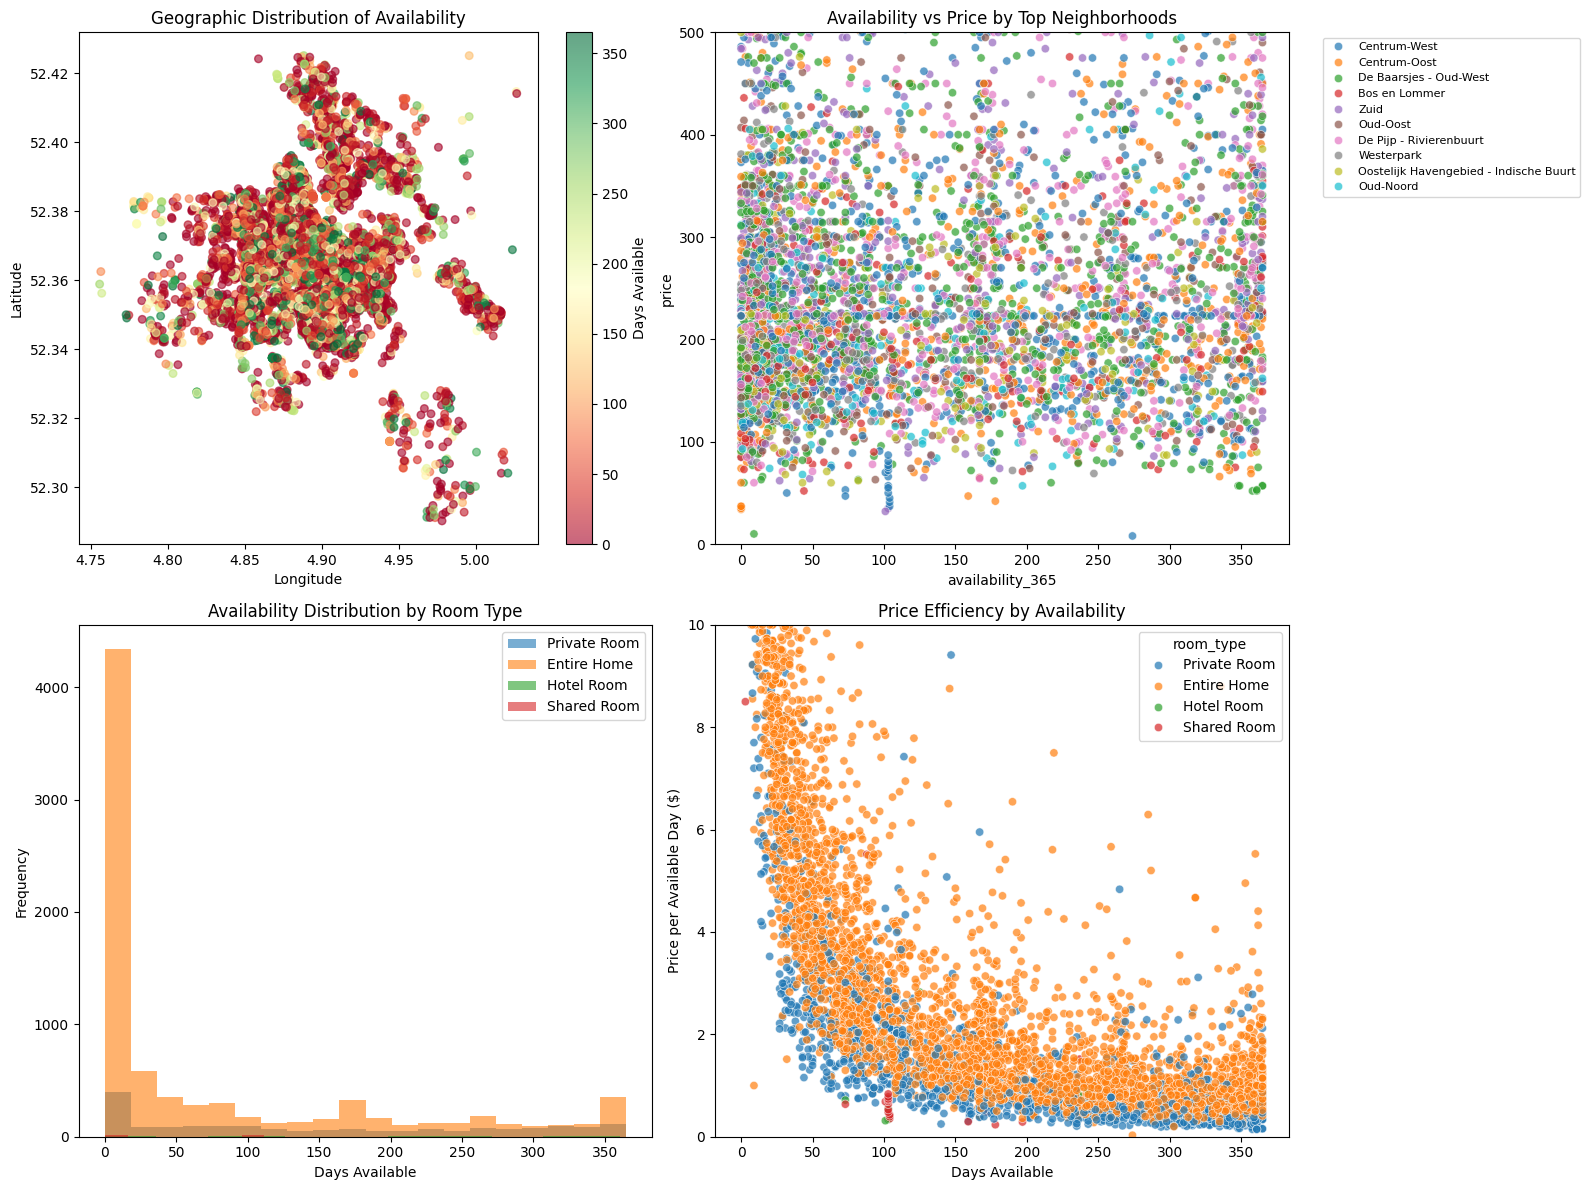

In [29]:
# Advanced Availability Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Geographic availability patterns
scatter = axes[0,0].scatter(df['longitude'], df['latitude'], 
                           c=df['availability_365'], s=30, alpha=0.6, 
                           cmap='RdYlGn')
axes[0,0].set_title("Geographic Distribution of Availability")
axes[0,0].set_xlabel("Longitude")
axes[0,0].set_ylabel("Latitude")
plt.colorbar(scatter, ax=axes[0,0], label='Days Available')

# 2. Availability vs Price by Neighborhood (top 10 neighborhoods)
top_neighborhoods = df['neighbourhood'].value_counts().head(10).index
df_top_neighborhoods = df[df['neighbourhood'].isin(top_neighborhoods)]
sns.scatterplot(data=df_top_neighborhoods, x='availability_365', y='price', 
                hue='neighbourhood', alpha=0.7, ax=axes[0,1])
axes[0,1].set_ylim(0, 500)
axes[0,1].set_title("Availability vs Price by Top Neighborhoods")
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# 3. Availability distribution comparison by room type
for room_type in df['room_type'].unique():
    subset = df[df['room_type'] == room_type]['availability_365']
    axes[1,0].hist(subset, alpha=0.6, label=room_type, bins=20)
axes[1,0].set_title("Availability Distribution by Room Type")
axes[1,0].set_xlabel("Days Available")
axes[1,0].set_ylabel("Frequency")
axes[1,0].legend()

# 4. Price efficiency by availability (Price per available day)
df['price_per_available_day'] = df['price'] / (df['availability_365'] + 1)
sns.scatterplot(data=df, x='availability_365', y='price_per_available_day', 
                hue='room_type', alpha=0.7, ax=axes[1,1])
axes[1,1].set_title("Price Efficiency by Availability")
axes[1,1].set_xlabel("Days Available")
axes[1,1].set_ylabel("Price per Available Day ($)")
axes[1,1].set_ylim(0, 10)  # Focus on reasonable range

plt.tight_layout()
plt.show()